In [10]:
import pandas as pd
import numpy as np
import sqlite3
import pandas_profiling
import rpy2
import rpy2.rinterface
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
#import rpy2.ipython

### Visualize the negative values

In [6]:
df = pd.read_csv('C:/githubrepo/7331_Project/data/Employee_Compensation.csv')
df_clean = pd.read_csv('C:/githubrepo/7331_Project/data/EmpComp_Cleaned.csv')
print("Finished Loading Data.")

Finished Loading Data.


In [20]:
df_cleanish = df[df['Year Type'] == 'Fiscal']
df_cleanish = df_cleanish.reset_index(drop=True)

### Gets the rows that have a least 1 negative value saves to df_neg

In [21]:
indexNames1 = df_cleanish.loc[df_cleanish['Salaries'] < 0, 'Salaries'].index.tolist()
indexNames2 = df_cleanish.loc[df_cleanish['Overtime'] < 0, 'Overtime'].index.tolist()
indexNames3 = df_cleanish.loc[df_cleanish['Other Salaries'] < 0, 'Other Salaries'].index.tolist()
indexNames4 = df_cleanish.loc[df_cleanish['Total Salary'] < 0, 'Total Salary'].index.tolist()
indexNames5 = df_cleanish.loc[df_cleanish['Retirement'] < 0, 'Retirement'].index.tolist()
indexNames6 = df_cleanish.loc[df_cleanish['Health and Dental'] < 0, 'Health and Dental'].index.tolist()
indexNames7 = df_cleanish.loc[df_cleanish['Other Benefits'] < 0, 'Other Benefits'].index.tolist()
indexNames8 = df_cleanish.loc[df_cleanish['Total Benefits'] < 0, 'Total Benefits'].index.tolist()
indexNames9 = df_cleanish.loc[df_cleanish['Total Compensation'] < 0, 'Total Compensation'].index.tolist()
indexCombo = indexNames1 + indexNames2 + indexNames3 + indexNames4 + indexNames5 + indexNames6 + indexNames7 + indexNames8 + indexNames9

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    return unique_list

ind = unique(indexCombo)
df_neg = df_cleanish.loc[ind]
df_neg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 192514 to 262141
Data columns (total 22 columns):
Year Type                  939 non-null object
Year                       939 non-null int64
Organization Group Code    939 non-null int64
Organization Group         939 non-null object
Department Code            935 non-null object
Department                 862 non-null object
Union Code                 939 non-null float64
Union                      939 non-null object
Job Family Code            939 non-null object
Job Family                 939 non-null object
Job Code                   939 non-null object
Job                        939 non-null object
Employee Identifier        939 non-null int64
Salaries                   939 non-null float64
Overtime                   939 non-null float64
Other Salaries             939 non-null float64
Total Salary               939 non-null float64
Retirement                 939 non-null float64
Health and Dental          939 non-nul

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002289601C400>,
      dtype=object)

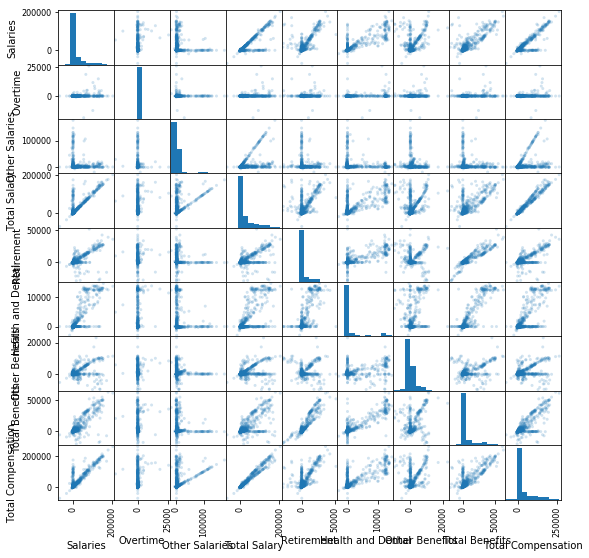

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_neg.iloc[:,13:22], alpha=0.2, figsize=(9, 9))
#sns.pairplot(autodata1, hue="origin", size=3)

##### Cleaned data that has negatives

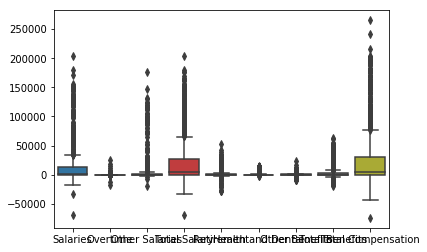

In [23]:
ax = sns.boxplot(data=df_neg.iloc[:,13:22])

##### Ceaned data without the negatives

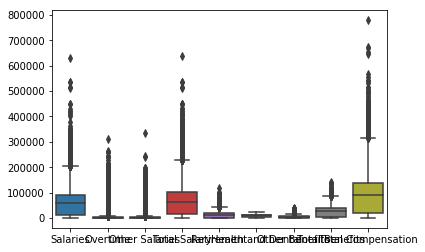

In [15]:
ax = sns.boxplot(data=df_clean.iloc[:,13:22])

### Number of rows with negatives for each columns

In [37]:
#Just plotting Salaries
print(len(indexNames1), "'Salaries'")
print(len(indexNames2), "'Overtime'")
print(len(indexNames3), "'Other Salaries'")
print(len(indexNames4), "'Total Salary'")
print(len(indexNames5), "'Retirement'")
print(len(indexNames6), "'Health and Dental'")
print(len(indexNames7), "'Other Benefits'")
print(len(indexNames8), "'Total Benefits'")
print(len(indexNames9), "'Total Compensation'")

105 'Salaries'
40 'Overtime'
89 'Other Salaries'
65 'Total Salary'
334 'Retirement'
145 'Health and Dental'
424 'Other Benefits'
362 'Total Benefits'
223 'Total Compensation'


##### Looking at just the rows with negative 'Salaries'

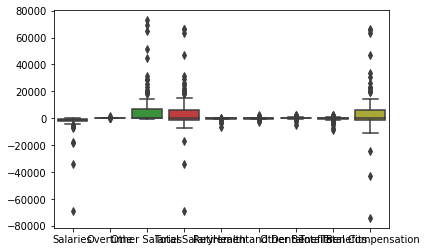

In [51]:
df_oneneg = df_cleanish.loc[indexNames1]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Overtime'

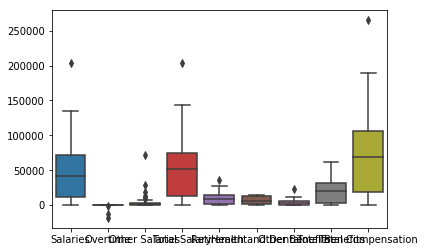

In [52]:
df_oneneg = df_cleanish.loc[indexNames2]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Other Salaries'

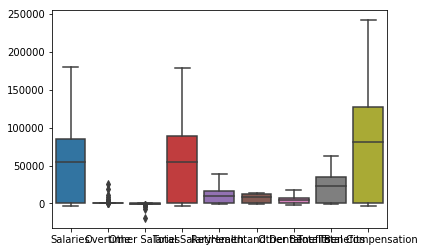

In [53]:
df_oneneg = df_cleanish.loc[indexNames3]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Total Salary'

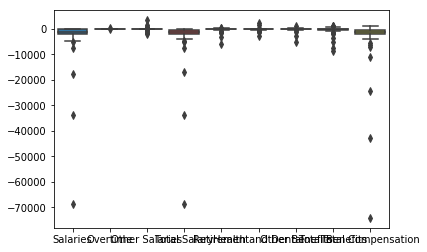

In [54]:
df_oneneg = df_cleanish.loc[indexNames4]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Retirement'

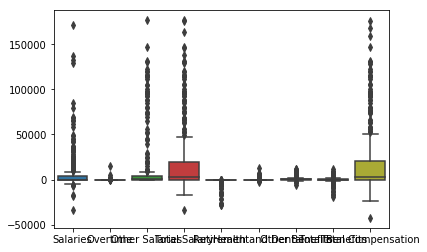

In [55]:
df_oneneg = df_cleanish.loc[indexNames5]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Health and Dental'

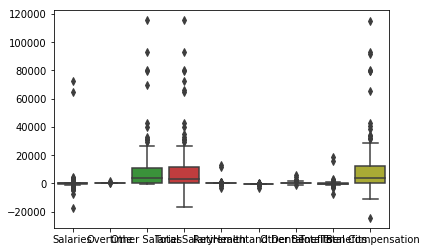

In [56]:
df_oneneg = df_cleanish.loc[indexNames6]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Other Benefits'

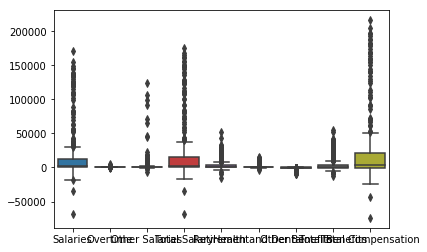

In [57]:
df_oneneg = df_cleanish.loc[indexNames7]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Total Benefits'

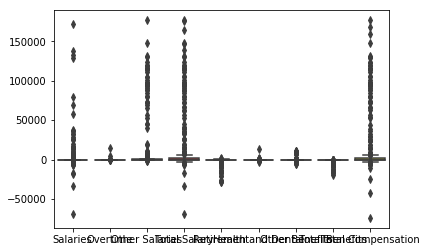

In [58]:
df_oneneg = df_cleanish.loc[indexNames8]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])

##### Looking at just the rows with negative 'Total Compensation'

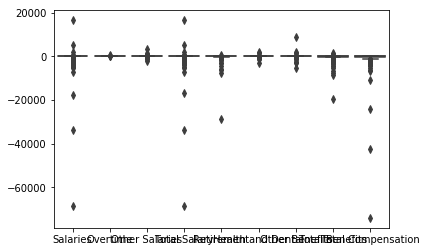

In [59]:
df_oneneg = df_cleanish.loc[indexNames9]
ax = sns.boxplot(data=df_oneneg.iloc[:,13:22])